In [1]:
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [2]:
US_POPN = 328_200_000

In [3]:
timeseries_tests = pd.DataFrame(requests.get("https://api.covidtracking.com/v1/us/daily.json").json())
timeseries_tests.dateChecked = timeseries_tests.dateChecked.str.replace("T24", "T00")
timeseries_tests['dateColumn'] = pd.to_datetime(timeseries_tests.dateChecked)
timeseries_tests = timeseries_tests.sort_values('dateColumn')
timeseries_tests['pct_popn'] = 100*timeseries_tests.positive / US_POPN

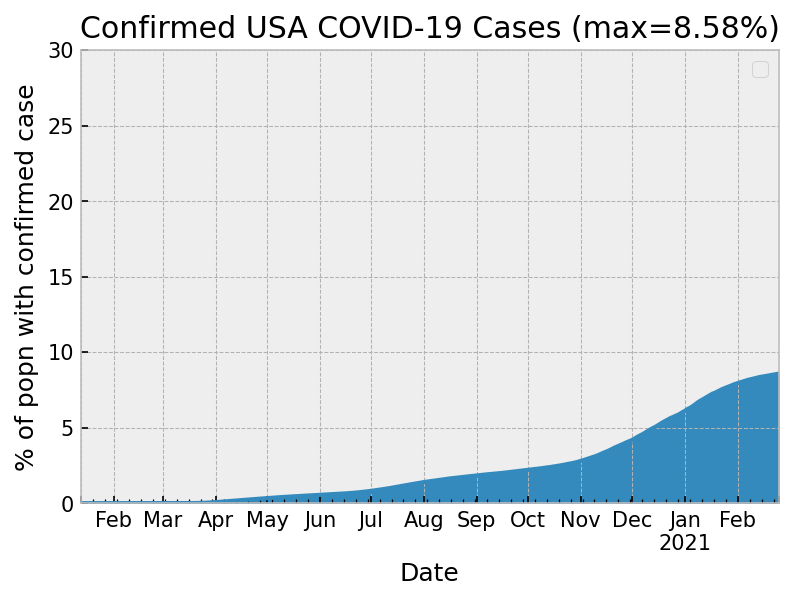

In [4]:
with plt.style.context("bmh"):
    plt.figure(figsize=(6, 4), dpi=150)
    timeseries_tests.plot(
        x="dateColumn", 
        y="pct_popn", 
        kind="area",
        ax=plt.gca()
    )
    plt.xlabel("Date")
    plt.ylabel("% of popn with confirmed case")
    plt.title(
        f"Confirmed USA COVID-19 Cases (max={round(timeseries_tests.pct_popn.max(), 2)}%)"
    )
    plt.ylim(0, 30)
    plt.legend([])